In [1]:
%matplotlib inline


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import SimpleITK as sitk
from pathlib import Path


In [3]:
t2_train_table = pd.read_pickle('/Users/alexanders-13mbp/Documents/DataProjects/Data/MBI/ProstateX/generated/tables/t2_train.pkl')


In [4]:
t2_significant_findings = t2_train_table[t2_train_table.ClinSig == True]


In [5]:
t2_significant_findings


,ProxID,DCMSerDescr,path_to_resampled_file,fid,pos,ijk,zone,ClinSig
1,ProstateX-0005,t2_tse_tra,/Users/alexanders-13mbp/Documents/DataProjects...,0,"(-14.5174331665039, 49.4428329467773, 20.78152...","(206, 233, 10)",PZ,True
2,ProstateX-0005,t2_tse_tra,/Users/alexanders-13mbp/Documents/DataProjects...,1,"(-38.6276, 42.2781, 21.4084)","(157, 219, 10)",PZ,True
4,ProstateX-0002,t2_tse_tra,/Users/alexanders-13mbp/Documents/DataProjects...,1,"(-27.0102, 41.5467, -26.0469)","(154, 217, 12)",PZ,True
11,ProstateX-0035,t2_tse_tra,/Users/alexanders-13mbp/Documents/DataProjects...,1,"(-22.9279, 28.8785, -29.5951)","(150, 197, 9)",AS,True
15,ProstateX-0019,t2_tse_tra,/Users/alexanders-13mbp/Documents/DataProjects...,1,"(-4.21012, 42.1916, -40.6457)","(182, 236, 10)",PZ,True
16,ProstateX-0019,t2_tse_tra,/Users/alexanders-13mbp/Documents/DataProjects...,1,"(-4.21012, 42.1916, -40.6457)","(182, 236, 10)",PZ,True
17,ProstateX-0026,t2_tse_tra,/Users/alexanders-13mbp/Documents/DataProjects...,1,"(-2.55984, 36.7959, -40.4785)","(175, 197, 6)",TZ,True
20,ProstateX-0028,t2_tse_tra,/Users/alexanders-13mbp/Documents/DataProjects...,1,"(32.6256, 39.4066, -7.95307)","(236, 210, 9)",PZ,True
41,ProstateX-0037,t2_tse_tra,/Users/alexanders-13mbp/Documents/DataProjects...,1,"(10.0109, 21.7560412231445, 0.489487200805664)","(162, 188, 9)",AS,True
45,ProstateX-0031,t2_tse_tra,/Users/alexanders-13mbp/Documents/DataProjects...,1,"(8.08436, 38.9556, 13.8648)","(231, 209, 17)",PZ,True


In [6]:
first_sig_case = t2_significant_findings.iloc[0]


In [7]:
first_sig_case_image = sitk.ReadImage(str(first_sig_case['path_to_resampled_file']))


In [8]:
first_sig_case_array = sitk.GetArrayViewFromImage(first_sig_case_image)


In [9]:
pos = first_sig_case['pos']


In [10]:
first_sig_case_cancer_loc = first_sig_case_image.TransformPhysicalPointToIndex(pos)


In [11]:
print("Physical space: ", pos) #(-14.51, 49.44, 20.78)


Physical space:  (-14.5174331665039, 49.4428329467773, 20.7815246582031)


In [12]:
print("Voxel: ", first_sig_case_cancer_loc) #(205, 150, 9)


Voxel:  (205, 150, 9)


In [13]:
print(first_sig_case_array.shape)


(19, 384, 384)


In [14]:
print(first_sig_case_array.ndim)


3


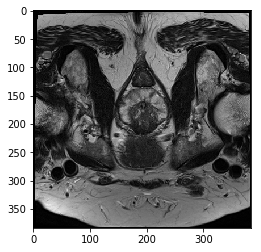

In [15]:
plt.imshow(first_sig_case_array[9,:,:], cmap = 'gray')


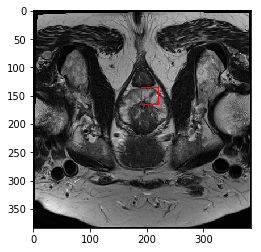

In [16]:
fig,ax = plt.subplots(1)
ax.imshow(first_sig_case_array[9,:,:], cmap = 'gray')
rect = patches.Rectangle((205-15,150-15),30,30,linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
plt.show()
